  <h1>     EDA  </h1>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("advertisement_data_logistic_regression.csv")

In [79]:
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 0:53:11,0.0
1,1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 1:39:02,0.0
2,2,69.47,26.0,NaN,NaN,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:42,0.0
3,3,NaN,NaN,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 2:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 3:36:18,0.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  902 non-null    float64
 2   Age                       909 non-null    float64
 3   Area Income               913 non-null    float64
 4   Daily Internet Usage      907 non-null    float64
 5   Ad Topic Line             896 non-null    object 
 6   City                      908 non-null    object 
 7   Male                      928 non-null    float64
 8   Country                   910 non-null    object 
 9   Timestamp                 911 non-null    object 
 10  Clicked on Ad             895 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [123]:
data.shape 

(1000, 11)

In [22]:
data.isnull().sum()

Unnamed: 0                    0
Daily Time Spent on Site     98
Age                          91
Area Income                  87
Daily Internet Usage         93
Ad Topic Line               104
City                         92
Male                         72
Country                      90
Timestamp                    89
Clicked on Ad               105
dtype: int64

In [9]:
mode1=data['City'].mode().values[0]
mode2=data['Male'].mode().values[0]
mode3=data['Country'].mode().values[0]
mode4=data['Timestamp'].mode().values[0]
data['City']=data['City'].replace(np.nan,mode1)
data['Male']=data['Male'].replace(np.nan,mode2)
data['Country']=data['Country'].replace(np.nan,mode3)
data['Timestamp']=data['Timestamp'].replace(np.nan,mode4)
data.isnull().sum()

Unnamed: 0                    0
Daily Time Spent on Site     98
Age                          91
Area Income                  87
Daily Internet Usage         93
Ad Topic Line               104
City                          0
Male                          0
Country                       0
Timestamp                     0
Clicked on Ad               105
dtype: int64

In [12]:
data_cat=data.select_dtypes( include='object')
data_num=data.select_dtypes(include='number')
for i in data_cat:
    data_cat[i].replace(np.nan,data_cat[i].mode().values[0] )
for i in data_num:
    data_num[i].replace(np.nan,data_num[i].mean(),inplace=True)

In [13]:
data_cat.isnull().sum()

Ad Topic Line    104
City               0
Country            0
Timestamp          0
dtype: int64

In [7]:
data_num.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

**We select numerical type and categorical features and fill missing numerical values to mean value and categorical values to mode value on that column.After that I use data_num.isnull().sum() and data_cat.isnull().sum() to demonstrate result**

In [107]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


In [34]:
data.drop_duplicates(inplace=True)

**In this case, we should discard the duplicate values, but there aren't any duplicate values in our dataset**

In [14]:
dataset = pd.concat([data_cat, data_num], axis=1, join="inner")

<AxesSubplot:>

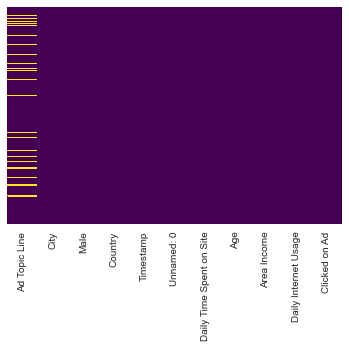

In [136]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')


Text(0.5, 0, 'Counrtry')

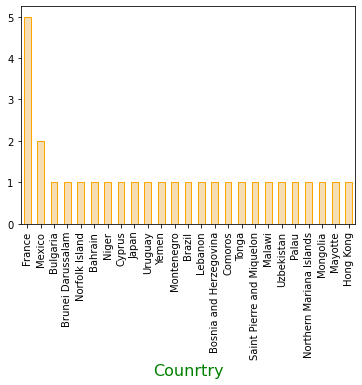

In [117]:
dataset['Country'].tail(30).value_counts().plot(kind='bar',color='wheat',ec='orange')
plt.xlabel('Counrtry',color='green',fontsize=16)

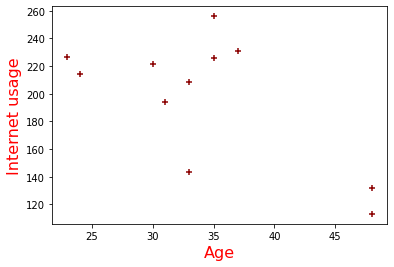

In [120]:
plt.scatter(data['Age'].head(15), data['Daily Internet Usage'].head(15), marker = '+', color = 'darkred')
plt.xlabel('Age',color='r',fontsize=16)
plt.ylabel('Internet usage',color='r',fontsize=16)
plt.xticks(rotation=0)
plt.show()

Text(0.5, 0, 'Male')

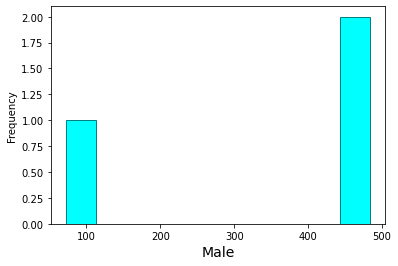

In [121]:
data['Male'].value_counts().plot(kind="hist",color='cyan',ec='teal')
plt.xlabel('Male',fontsize=14)

<AxesSubplot:>

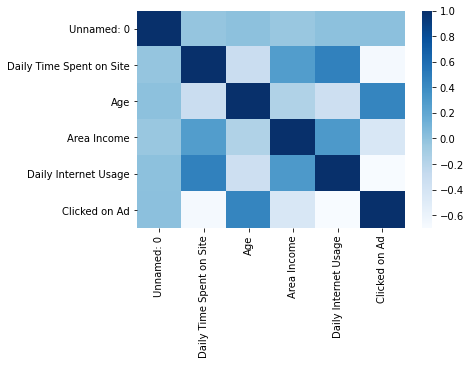

In [122]:
plt.figure(figsize=(6,4))
sns.heatmap(dataset.corr(),cmap='Blues',annot=False) 

In [159]:
dataset.corr()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Unnamed: 0,1.000000,-0.024650,NaN,-0.041180,0.003983,0.013652
Daily Time Spent on Site,-0.024650,1.000000,NaN,0.280268,0.469658,-0.672516
Age,NaN,NaN,NaN,NaN,NaN,NaN
Area Income,-0.041180,0.280268,NaN,1.000000,0.304861,-0.430696
Daily Internet Usage,0.003983,0.469658,NaN,0.304861,1.000000,-0.700712
Clicked on Ad,0.013652,-0.672516,NaN,-0.430696,-0.700712,1.000000


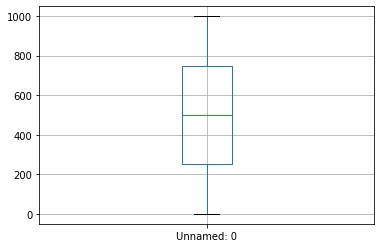

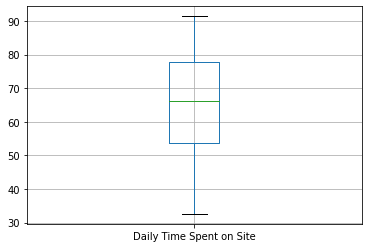

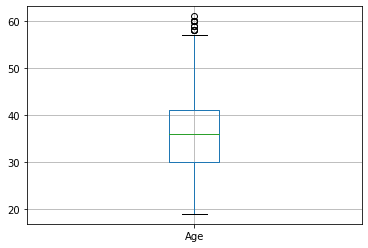

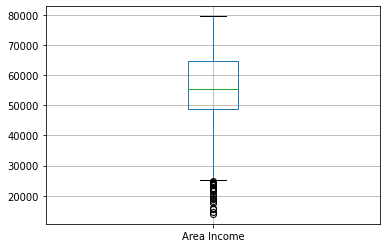

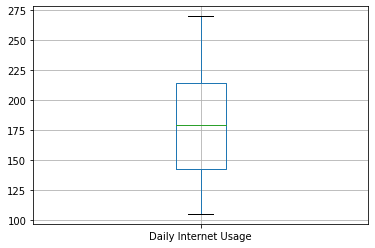

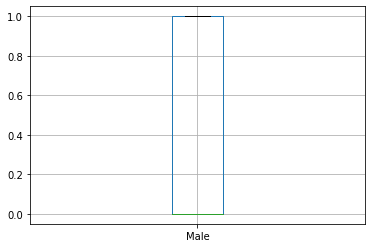

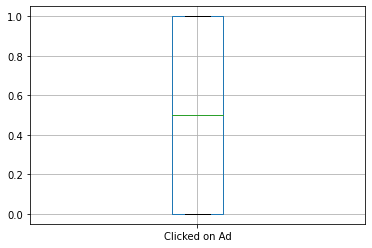

In [15]:

for column in data_num:
    plt.figure()
    data_num.boxplot([column])

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_r=Q1-(1.5*IQR)
    upper_r=Q3+(1.5*IQR)
    return lower_r,upper_r

In [18]:
for col in data_num:
    lower,upper=remove_outlier(dataset[col])
    data_num[col]=np.where(data_num[col]>upper,upper,data_num[col])
    data_num[col]=np.where(data_num[col]>lower,lower,data_num[col])

<ipython-input-18-a2d9ebe09cd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[col]=np.where(data_num[col]>upper,upper,data_num[col])
<ipython-input-18-a2d9ebe09cd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[col]=np.where(data_num[col]>lower,lower,data_num[col])
<ipython-input-18-a2d9ebe09cd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

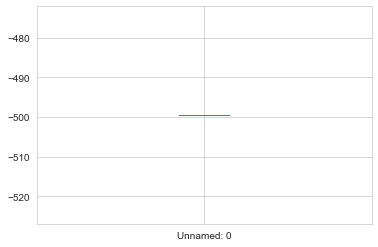

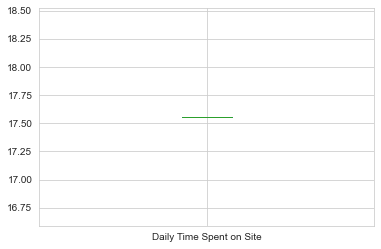

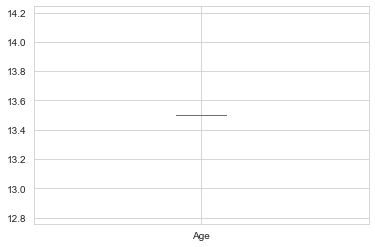

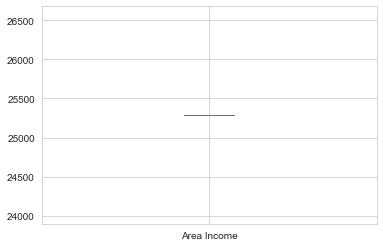

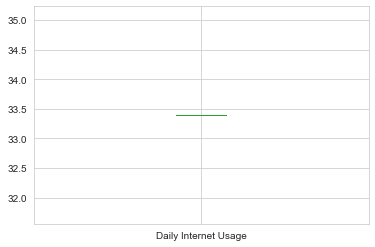

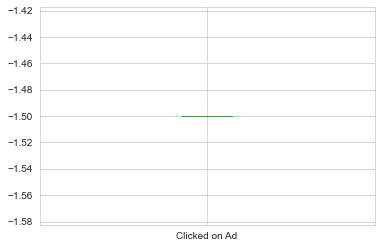

In [158]:

for column in data_num:
    plt.figure()
    data_num.boxplot([column])

In [ ]:
for i in data_cat:
        dataset[i] = dataset[i].str.strip()
        LabelEncoder_ = preprocessing.LabelEncoder()
        dataset[i] = LabelEncoder_.fit_transform(dataset[i])

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,-499.5,17.555,13.5,25287.87625,33.39375,-1.5
1,-499.5,17.555,13.5,25287.87625,33.39375,-1.5
2,-499.5,17.555,13.5,25287.87625,33.39375,-1.5
3,-499.5,17.555,13.5,25287.87625,33.39375,-1.5
4,-499.5,17.555,13.5,25287.87625,33.39375,-1.5


<h2>Hypothesis testing<h2/>

In [30]:
import math
def SimpleRandomSampling(data,sample_size):
    random_sample = data.iloc[
    np.random.randint(
        0, 
        len(data), 
        sample_size
    )
        
]
    return random_sample

In [22]:
sample = SimpleRandomSampling(dataset['Daily Internet Usage'],30)
sample_mean=sample.mean()
print("Mean from Population",dataset['Daily Internet Usage'].mean())
print("Mean from Sample:",sample_mean)

Mean from Population 179.35327453142227
Mean from Sample: 177.47866078647564


**H0:m==179.35,Ha:m<179.35**


**The Z-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.I choose Daily Internet Usage feature from dataset and choose 30 sample size using random sampling.Acording to our population mean Daily Internet Usage equal to 179.35,but from our sample we can see sample mean equal to 177.478.**

Specify <b>level of significance </b>

In [49]:
from scipy import stats
from statsmodels.stats import weightstats as stests
alpha =0.05
null_mean =179.35
data = sample
ztest ,pval = stests.ztest(data, x2=None, value=null_mean,alternative='larger')
critical_val=stats.norm.isf(alpha)
print("Z-score:",pval)
print("Critical value:",critical_val)
if pval>critical_val:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Z-score: 0.598775756771074
Critical value: 1.6448536269514729
accept null hypothesis


**We calculate z-score and compare with tabular z-score(1.64>0.598).Hence,we don't reject null hypothesis and our H0 is true.**

<h2>Linear regression<h2/>

In [162]:
from sklearn import linear_model

# OSL() model can be used from statmodels package
import statsmodels.api as sm

# we will perform sampling using train_test_split module for training and testin set
# and we will use GridSearchCV to find the best parameters for SGDRegressor()
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# we will evaluate our models using RMSE(mean_squared_error) and Determination coefficient(r2_score)
from sklearn.metrics import mean_squared_error, r2_score

# in case you will use polinominal features
from sklearn.preprocessing import PolynomialFeatures

In [168]:
X = dataset[['Daily Time Spent on Site','Age','Area Income','Clicked on Ad']].copy()
Y=dataset[['Daily Internet Usage']].copy()

In [169]:
X.shape, Y.shape

((1000, 4), (1000, 1))

In [170]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0 )

In [171]:
x_train_ols =  sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train, missing="drop").fit()
y_predicted_ols=ols_model.predict(x_test)

**Dummy model**

In [172]:
lr_model = linear_model.LinearRegression()

In [173]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [174]:
print('Score:', lr_model.score(x_test, y_test))


Score: 0.5267906108626539


**Improving model**

In [176]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,cross_val_predict
from sklearn import linear_model, tree, ensemble
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection


In [177]:
skbest = SelectKBest(score_func=f_regression, k = 5)

In [180]:
y = dataset[['Daily Internet Usage']].copy()
X = dataset[['Daily Time Spent on Site','Age','Area Income','Clicked on Ad']].copy()

In [181]:
scores = cross_val_score(lr_model, X, y, cv=5)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.47633004 0.51912356 0.47877157 0.42730747 0.50059544]


In [182]:
predictions = cross_val_predict(lr_model, X, y, cv=5)
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.4853288963415313


**The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out.**